# Data-Driven Brand Mastery: EABL's Social Analytics


## Business Overview
### Introduction:
East African Breweries Limited (EABL) stands as a preeminent player in the Fast-Moving Consumer Goods (FMCG) sector, particularly within the competitive beverage industry. Operating across East Africa, EABL has established a robust market presence in countries such as Kenya, Uganda, Tanzania, Rwanda, and South Sudan. The company boasts a diverse and iconic portfolio of brands, including Tusker Lager, Pilsner Lager, WhiteCap Lager, Johnnie Walker, Smirnoff, Gilbey's Gin, Richot Brandy, Bond 7 Whiskey, and Baileys Irish Cream. (EABL, 2023)



### Strategic Approach:
EABL has adopted a forward-thinking approach, recognizing the pivotal role of data science in shaping its business strategies. The company understands that leveraging data analytics is instrumental in brand monitoring, enhancing brand perception, and driving meaningful customer engagement.

### Data Science in Brand Monitoring:
EABL employs cutting-edge data science techniques to monitor its brand performance in real-time. By harnessing data from social media, market surveys, and other relevant sources, the company gains valuable insights into consumer sentiments, emerging trends, and competitive landscapes. This enables EABL to proactively respond to market dynamics and fine-tune its branding strategies accordingly.


##  Problem Statement:

EABL faces challenges in effectively gauging and understanding customer sentiments expressed across various channels, including social media, online reviews, and customer feedback. The current methods for manually analyzing textual data are resource-intensive and may not capture the nuances and real-time dynamics of customer sentiments.
### Key Challenges:

1. <b>Sentiment Understanding</b>: The current approach to understanding customer sentiments lacks precision, leading to potential misinterpretation of feedback and an inability to promptly address concerns or capitalize on positive sentiments.

2. <b>Real-time Analysis</b>: Manual sentiment analysis is time-consuming and cannot keep pace with the rapid and dynamic nature of online discussions and customer interactions, hindering timely response strategies.

## Objective
<b>Main Objective</b> :Develop an automated sentiment analysis system to accurately classify customer sentiments expressed in textual data.


<b>Specific Objectives</b> :
1. Analyze sentiments expressed by consumers regarding EABL products, marketing campaigns, and brand image.Categorize sentiments as positive, negative, or neutral to derive actionable insights.

2. Leverage sentiment insights to inform marketing strategies, product enhancements, and overall customer engagement initiatives Leverage sentiment insights to inform marketing strategies, product enhancements, and overall customer engagement initiatives.

3. Implement sentiment-driven customer segmentation to tailor marketing messages and promotions based on distinct customer sentiment profiles


###  Success Criteria
<b>Sentiment Analysis Accuracy</b>:Evaluate the accuracy of the sentiment analysis model by comparing predicted sentiments against manually labeled data.(at least 85% )
Aim for high precision and recall, especially for identifying positive and negative sentiments.

<b>Segmentation Model Performance</b>:Assess the effectiveness of the customer segmentation model in accurately grouping users based on sentiment and additional features.



### Stakeholders

<b>Marketing Team:</b> Benefit from insights to optimize marketing strategies and refine campaigns.

<b>Product Development Team:</b> Utilize feedback for continuous product improvement and innovation.

<b>Executive Leadership:</b> Receive regular reports on brand health and public perception for strategic decision-making.

## Data Understanding

#### 1. Brand Mentions:

Social media posts, comments, and mentions related to EABL and its brands.

Data sources: Twitter,(Likes, shares, comments, EABL relevant hashtags.) and Google News 


#### Product Feedback:

Comments and discussions regarding specific EABL products.

#### Data sources:

Social media platforms, review sites, online forums.

Data on taste, packaging, pricing, and overall satisfaction.

#### Campaign Reactions:

Public reactions to EABL's marketing campaigns and promotions.

Data sources: Social media platforms.

#### Event Participation:

Social media mentions related to EABL-sponsored events and promotions.

#### Customer Service Interactions:

Social media interactions with EABL's official customer service handles.

## Importing Libraries

In [1]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting statistical graphs
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import squarify
from collections import Counter

# Load the Text Cleaning Package
import neattext.functions as nfx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm ##new progress bars repeatedly
import os
import nltk ##building Python programs to work with human language data
#import spacy #for training the NER model tokenize words
#import random
#from spacy.util import compounding
#from spacy.util import minibatch


pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)


import warnings
warnings.filterwarnings("ignore")

### Importing Datasets

In [2]:
# reading the datasets
Eabl_mentions = pd.read_csv("FinalMentions.CSV")
Eabl_hashtags = pd.read_csv("FinalHashtags.CSV")
Eabl_brands = pd.read_csv("eablProducts.csv")
Google_news = pd.read_csv('FinalGoogleNews.csv')
Chrome_Gin = pd.read_csv("ChromeGin.CSV")

#### MERGING DATAFRAMES

In [3]:
# Combining  the DataFrames vertically to form one data frame
combined_df = pd.concat([Eabl_mentions, Eabl_hashtags, Eabl_brands, Chrome_Gin], ignore_index=True)
combined_df.head()

,Unnamed: 0,cleaned_text,sentiment,stats,comments,retweets,quotes,likes,user
0,0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40.0,1,157.0,NaN
1,1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29.0,1,194.0,NaN
2,2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122.0,2,537.0,NaN
3,3,i thought eabl products are unwanted around the mountain,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0.0,0,0.0,NaN
4,4,NaN,Neutral,"Jan 10, 2024 · 2:39 PM UTC",0,0.0,0,1.0,NaN


In [4]:
combined_df.to_csv("CombinedFinal.csv")

### 1. DATA CLEANING

In [5]:
print(f"Our Final Combined data has {combined_df.shape[0]} rows & {combined_df.shape[1]} columns.")

Our Final Combined data has 125218 rows & 9 columns.


In [6]:
#dropping the Unnamed: 0 column
combined_df = combined_df.drop('Unnamed: 0',axis=1)
combined_df.head(5)

,cleaned_text,sentiment,stats,comments,retweets,quotes,likes,user
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40.0,1,157.0,NaN
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29.0,1,194.0,NaN
2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122.0,2,537.0,NaN
3,i thought eabl products are unwanted around the mountain,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0.0,0,0.0,NaN
4,NaN,Neutral,"Jan 10, 2024 · 2:39 PM UTC",0,0.0,0,1.0,NaN


In [7]:
print(f"{combined_df.columns}")


Index(['cleaned_text', 'sentiment', 'stats', 'comments', 'retweets', 'quotes',
       'likes', 'user'],
      dtype='object')


##### 1. Missing values

In [8]:
# Checking for missing values in each column
missing_values = combined_df.isna().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"The {column} column has {count} missing values")      

The cleaned_text column has 2914 missing values
The sentiment column has 4 missing values
The stats column has 2 missing values
The retweets column has 1 missing values
The quotes column has 1 missing values
The likes column has 1 missing values
The user column has 68748 missing values


In [11]:
# Calculating percentage of missing values in each column
missing_percentage = combined_df.isna().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 0]


# A DataFrame with columns and percentage of missing values
missing_table = pd.DataFrame({
    'Columns': missing_percentage.index,
    '% of Missing Values': missing_percentage.values
})
print("Percentage of Missing Values")
missing_table

Percentage of Missing Values


,Columns,% of Missing Values
0,cleaned_text,2.327141
1,sentiment,0.003194
2,stats,0.001597
3,retweets,0.000799
4,quotes,0.000799
5,likes,0.000799
6,user,54.902650


In [9]:
# Drop rows with NaN values in the 'cleaned_text', 'sentiment','stats columns
combined_df = combined_df.dropna(subset=['cleaned_text','sentiment','stats'])
# Fill NaN values in the 'user' column with zero, it will be of use in future analysis
combined_df['user'].fillna(0, inplace=True)
combined_df.shape

(122300, 8)

In [10]:
# Calculate the percentage of missing values for each column
missing_percentages1 = (combined_df.isnull().sum() / len(combined_df)) * 100

# Print the result
print("Percentage of missing values in each column:")
print(missing_percentages1)

Percentage of missing values in each column:
cleaned_text    0.0
sentiment       0.0
stats           0.0
comments        0.0
retweets        0.0
quotes          0.0
likes           0.0
user            0.0
dtype: float64


#####  2. Duplicates

In [11]:
# checking for dupliacated rows in the df
duplicated_rows = combined_df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 678 duplicated rows.


In [12]:
#dropping all the duplicates
combined_df = combined_df.drop_duplicates()

In [13]:
duplicated_rows = combined_df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


#####  3. Correcting Data Types

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121622 entries, 0 to 125217
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cleaned_text  121622 non-null  object 
 1   sentiment     121622 non-null  object 
 2   stats         121622 non-null  object 
 3   comments      121622 non-null  int64  
 4   retweets      121622 non-null  float64
 5   quotes        121622 non-null  object 
 6   likes         121622 non-null  float64
 7   user          121622 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 8.4+ MB


#####  4. Outliers

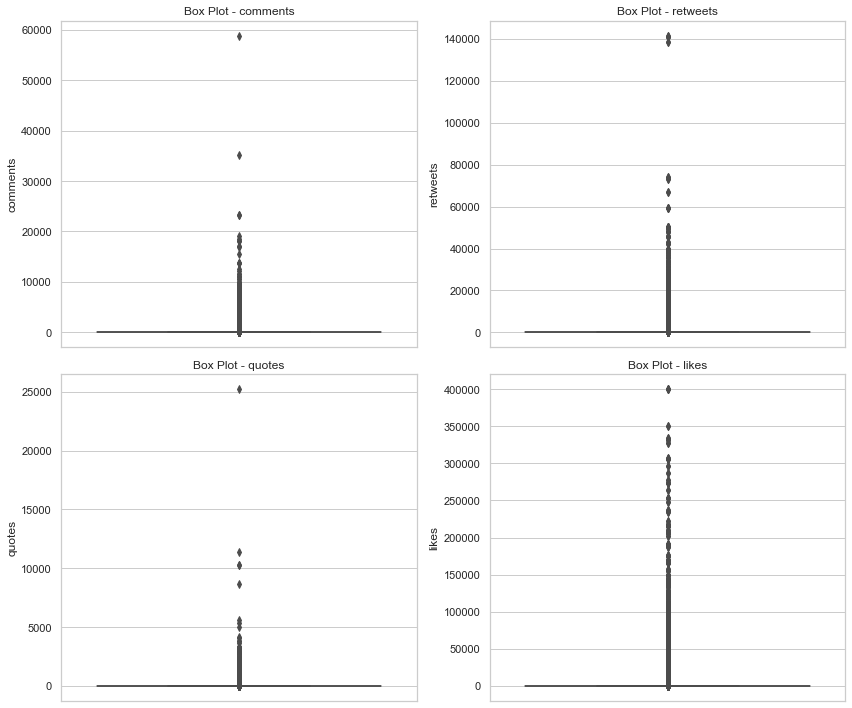

In [15]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Columns to check for outliers
columns_to_check = ['comments', 'retweets', 'quotes', 'likes']

# Convert 'quotes' column to float
combined_df['quotes'] = combined_df['quotes'].astype(float)

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(columns_to_check):
    sns.boxplot(y=combined_df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')
    axes[i].set_ylabel(column)  # Add y-axis label if needed

# Adjust layout
plt.tight_layout()
plt.show()


##### 5. Removing Uncessary Text

In [16]:
def clean_text(text):
    # Removing any unnecessary characters, symbols, or special characters
    cleaned_text = ' '.join(e for e in str(text).split() if (e.isalnum() or e.isspace()))
    # Converting all the text to lowercase
    cleaned_text = cleaned_text.lower()
    # Removing extra whitespaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Applying the cleaning function to the 'cleaned_text' column
combined_df['cleaned_text'] = combined_df['cleaned_text'].apply(clean_text)

# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis is an approach of preforming initial investigations on dataset in order to unearth hidden patterns, test hypothesis and to identify outliers. It also enables us to see what the data can tell us beyond formal modeling or hypothesis testing.

## 2. FEATURE ENGINEERING

In [17]:
combined_df.head(5)

,cleaned_text,sentiment,stats,comments,retweets,quotes,likes,user
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40.0,1.0,157.0,0
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29.0,1.0,194.0,0
2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122.0,2.0,537.0,0
3,i thought eabl products are unwanted around the mountain,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0.0,0.0,0.0,0
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,Neutral,"Jan 10, 2024 · 10:12 AM UTC",1,0.0,0.0,0.0,0


##### 1. Length of the text

In [18]:
# Calculating  the number of words in the 'cleaned_text' column
combined_df['text_length_words'] = combined_df['cleaned_text'].apply(lambda x: len(str(x).split()))

combined_df[['cleaned_text', 'text_length_words']].head()

,cleaned_text,text_length_words
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,45
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,28
2,kenyans wakitambua hii beer it is over for eabl,9
3,i thought eabl products are unwanted around the mountain,9
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,19


In [23]:
print(f"The Maximum number of words is {combined_df['text_length_words'].max()} & The Minimum number of words is {combined_df['text_length_words'].min()}")

The Maximum number of words is 879 & The Minimum number of words is 0


###  Datetime Features

In [19]:
# Converting 'stats' column to datetime format
combined_df['stats'] = pd.to_datetime(combined_df['stats'], format='%b %d, %Y · %I:%M %p UTC', errors='coerce')

# Extracting datetime features
combined_df['day'] = combined_df['stats'].dt.day
combined_df['month'] = combined_df['stats'].dt.month
combined_df['year'] = combined_df['stats'].dt.year
combined_df['hour'] = combined_df['stats'].dt.hour
combined_df['day_of_week'] = combined_df['stats'].dt.dayofweek

combined_df[['stats', 'day', 'month', 'year', 'hour','day_of_week']].head()


,stats,day,month,year,hour,day_of_week
0,2024-01-07 04:59:00,7.0,1.0,2024.0,4.0,6.0
1,2024-01-09 17:13:00,9.0,1.0,2024.0,17.0,1.0
2,2024-01-09 13:45:00,9.0,1.0,2024.0,13.0,1.0
3,2024-01-10 14:43:00,10.0,1.0,2024.0,14.0,2.0
6,2024-01-10 10:12:00,10.0,1.0,2024.0,10.0,2.0


In [20]:
# Converting 'day_of_week' to text
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
combined_df['day_of_week_text'] = combined_df['day_of_week'].map(day_of_week_mapping)

# Converting 'month' to text
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
combined_df['month_text'] = combined_df['month'].map(month_mapping)

combined_df[['stats', 'day', 'month', 'year', 'hour','day_of_week_text', 'month_text']].head()

,stats,day,month,year,hour,day_of_week_text,month_text
0,2024-01-07 04:59:00,7.0,1.0,2024.0,4.0,Sunday,January
1,2024-01-09 17:13:00,9.0,1.0,2024.0,17.0,Tuesday,January
2,2024-01-09 13:45:00,9.0,1.0,2024.0,13.0,Tuesday,January
3,2024-01-10 14:43:00,10.0,1.0,2024.0,14.0,Wednesday,January
6,2024-01-10 10:12:00,10.0,1.0,2024.0,10.0,Wednesday,January


##### 3. Total Engagement

In [21]:
# calculating the total number of engagement in each post
combined_df['total_engagement'] = combined_df['comments'] + combined_df['retweets'] + combined_df['quotes'] + combined_df['likes']

In [22]:
# Create a copy of the original DataFrame
combined_df_copy = combined_df.copy()

# Define the keywords
keywords = ['Chrome', 'Oktobafest', 'Gilbeys', 'Tusker']

# Create columns for each keyword in the copied DataFrame
for keyword in keywords:
    combined_df_copy[f'mentions_{keyword.lower()}'] = combined_df_copy['cleaned_text'].str.contains(keyword, case=False)

# Convert the boolean values to 1 for True and 0 for False
for keyword in keywords:
    combined_df_copy[f'mentions_{keyword.lower()}'] = combined_df_copy[f'mentions_{keyword.lower()}'].astype(int)

# Print the resulting DataFrame
print(combined_df_copy[['cleaned_text'] + [f'mentions_{keyword.lower()}' for keyword in keywords]].head())


                                                                                                                                                                                                                                                     cleaned_text  \
0  guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there   
1                                                                              drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl   
2                                                                                                                                                                                                                 kenyans

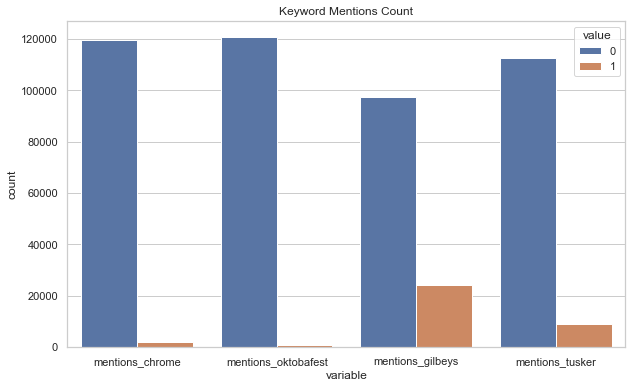

In [23]:
# Melt the DataFrame to create a long-form structure
melted_df = pd.melt(combined_df_copy, value_vars=[f'mentions_{keyword.lower()}' for keyword in keywords])

# Plot the count of each keyword mention
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=melted_df, x='variable', hue='value')
plt.title('Keyword Mentions Count')
plt.show()

##### 4. Total Engagement

In [24]:
# A function to classify weekdays and weekends
def classify_weekday_weekend(day_of_week):
    if day_of_week < 5:  # Monday to Friday (0 to 4)
        return 'Weekday'
    else:  # Saturday and Sunday (5 and 6)
        return 'Weekend'

# Apply the function to create a new 'weekday_or_weekend' column
combined_df['weekday_or_weekend'] = combined_df['day_of_week'].apply(classify_weekday_weekend)

In [25]:
#dropping irrelevant columns
combined_df = combined_df.drop(['stats','day_of_week','month'],axis=1)

In [26]:
# Renaming the columns
combined_df = combined_df.rename(columns={
    'cleaned_text': 'text',
    'text_length_words': 'length',
    'day': 'day(month)',
    'day_of_week_text': 'day(week)',
    'month_text': 'month',
    'weekday_or_weekend': 'weekday/end'
})

# Display the DataFrame with the renamed columns
combined_df.head()

,text,sentiment,comments,retweets,quotes,likes,user,length,day(month),year,hour,day(week),month,total_engagement,weekday/end
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,14,40.0,1.0,157.0,0,45,7.0,2024.0,4.0,Sunday,January,212.0,Weekend
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,18,29.0,1.0,194.0,0,28,9.0,2024.0,17.0,Tuesday,January,242.0,Weekday
2,kenyans wakitambua hii beer it is over for eabl,Neutral,33,122.0,2.0,537.0,0,9,9.0,2024.0,13.0,Tuesday,January,694.0,Weekday
3,i thought eabl products are unwanted around the mountain,Neutral,0,0.0,0.0,0.0,0,9,10.0,2024.0,14.0,Wednesday,January,0.0,Weekday
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,Neutral,1,0.0,0.0,0.0,0,19,10.0,2024.0,10.0,Wednesday,January,1.0,Weekday


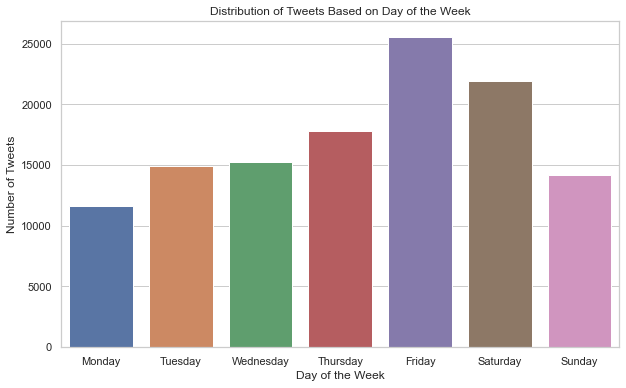

In [27]:
# Plot the distribution of tweets based on the day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='day(week)', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Tweets Based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.show()


<b>Fridays</b> is the peak of people contribution of the EABL tweeter(X) platform. People tend to tweet more about alcohol on Fridays due to the end-of-week celebration, social gatherings, popular hashtags like #FridayFeeling, the association of Fridays with relaxation, and cultural norms that encourage discussions about alcohol-related activities on certain days.  

<b>Mondays</b>, has the least tweets. This is partially due to people, generally focused on the start of the workweek, responsibilities, and may have a more serious or work-oriented mindset. There's often less emphasis on celebratory or leisure activities like alcohol consumption. Additionally, Monday is often associated with recovering from the weekend, setting professional goals, and a lower inclination for socializing compared to the more relaxed atmosphere on Fridays

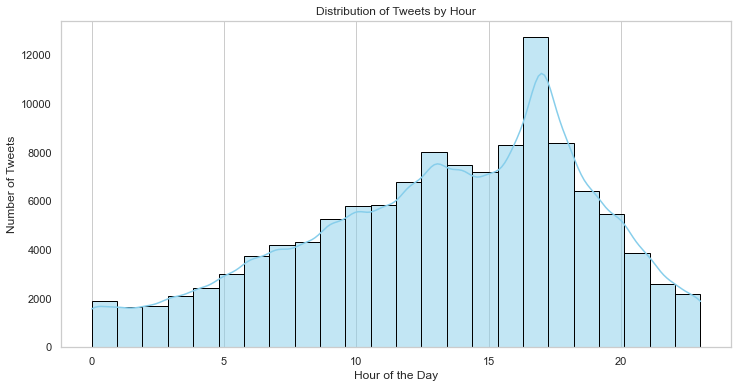

In [28]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the distribution of tweets by hour
sns.histplot(data=combined_df, x='hour', bins=24, kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Tweets by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.grid(axis='y')

# Show the plot
plt.show()


1. End of Workday: Many users tweet around 5 PM as it marks the end of the workday, providing a convenient time for them to engage in social media activities.
2. Commute Time:People tweet during their commute home, making 5 PM a popular time for sharing thoughts and updates.
3. Break Time:Individuals take breaks in the late afternoon to unwind, with 5 PM becoming a common time for social media engagement.
4. Global Connectivity:5 PM aligns with peak online activity, connecting users from different time zones and contributing to increased Twitter usage.
5. Social Interaction:Twitter is used for social interactions, and 5 PM serves as a time for connecting with friends and colleagues, sharing daily updates.

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
user_level_df = combined_df.copy()

# Convert sentiment to numerical values (e.g., using Label Encoding)
label_encoder = LabelEncoder()
user_level_df['sentiment_encoded'] = label_encoder.fit_transform(user_level_df['sentiment'])

# Aggregate sentiment metrics at the user level
user_sentiment_metrics = user_level_df.groupby('user').agg(
    average_sentiment=('sentiment_encoded', 'mean'),  # Average sentiment
    positive_tweets=('sentiment', lambda x: (x == 'Positive').sum()),  # Count of positive tweets
    negative_tweets=('sentiment', lambda x: (x == 'Negative').sum()),  # Count of negative tweets
    overall_sentiment_distribution=('sentiment', 'size')  # Overall sentiment distribution
)

# Calculate the overall sentiment distribution
user_sentiment_metrics['overall_sentiment_distribution'] /= user_sentiment_metrics['overall_sentiment_distribution'].sum()

# Display the user-level sentiment metrics
print(user_sentiment_metrics)


                  average_sentiment  positive_tweets  negative_tweets  \
user                                                                    
0                          3.684777             5218             1521   
@0004jxy                   4.000000                0                0   
@001Empress28528           5.000000                0                0   
@001Omy                    4.000000                0                0   
@001sonystate              4.250000                0                0   
...                             ...              ...              ...   
@zynaps                    4.000000                0                0   
@zythophiliac              4.000000                0                0   
@zziwasj2                  4.000000                0                0   
@zzkaya                    5.000000                0                0   
@zzzzzzwdazz               4.000000                0                0   

                  overall_sentiment_distribution  

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
selected_features = ['average_sentiment', 'positive_tweets', 'negative_tweets', 'overall_sentiment_distribution']

# Handle missing values if needed
user_sentiment_metrics.dropna(subset=selected_features, inplace=True)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_sentiment_metrics[selected_features])

# Apply k-means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
user_sentiment_metrics['cluster'] = kmeans.fit_predict(scaled_features)

# Analyze results
cluster_analysis = user_sentiment_metrics.groupby('cluster')[selected_features].mean()
print(cluster_analysis)


         average_sentiment  positive_tweets  negative_tweets  \
cluster                                                        
0                 3.843131                0                0   
1                 3.684777             5218             1521   
2                 4.922274                0                0   

         overall_sentiment_distribution  
cluster                                  
0                              0.000019  
1                              0.540404  
2                              0.000018  


The folowing are the clusters represented
1. Cluster 0: Users in this cluster have  a lower average sentiment.(average :3.843131)
2. Cluster 1: Users in this cluster have  a moderate average sentiment.(average: 3.684777 )
3. Cluster 2: Users in this cluster have a higher average sentiment.(average: 922274)

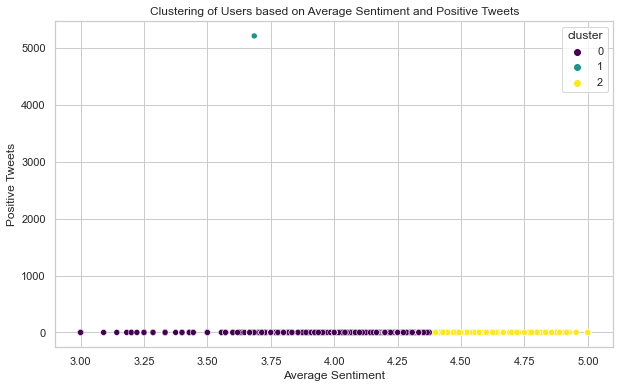

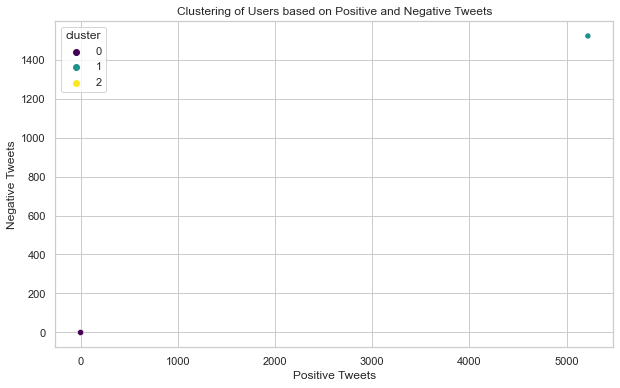

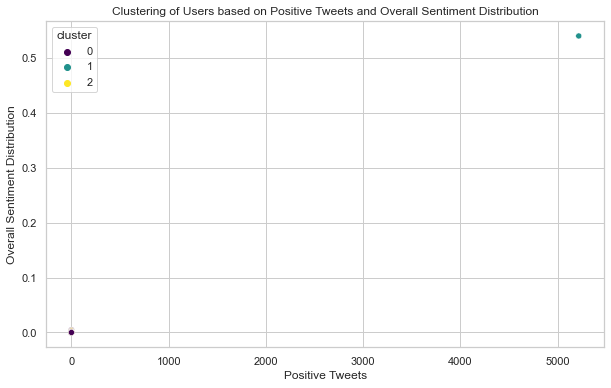

In [37]:
# Scatter plot of Average Sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_sentiment', y='positive_tweets', hue='cluster', data=user_sentiment_metrics, palette='viridis', legend='full')
plt.title('Clustering of Users based on Average Sentiment and Positive Tweets')
plt.xlabel('Average Sentiment')
plt.ylabel('Positive Tweets')
plt.show()

# Scatter plot of Frequency of Positive and Negative Tweets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='positive_tweets', y='negative_tweets', hue='cluster', data=user_sentiment_metrics, palette='viridis', legend='full')
plt.title('Clustering of Users based on Positive and Negative Tweets')
plt.xlabel('Positive Tweets')
plt.ylabel('Negative Tweets')
plt.show()

# Scatter plot of Overall Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='positive_tweets', y='overall_sentiment_distribution', hue='cluster', data=user_sentiment_metrics, palette='viridis', legend='full')
plt.title('Clustering of Users based on Positive Tweets and Overall Sentiment Distribution')
plt.xlabel('Positive Tweets')
plt.ylabel('Overall Sentiment Distribution')
plt.show()


 Cluster 1: Users have high number of positive sentiments.
These customer may receive messages emphasizing brand loyalty, while negative segments may receive messages addressing concerns or offering solutions.


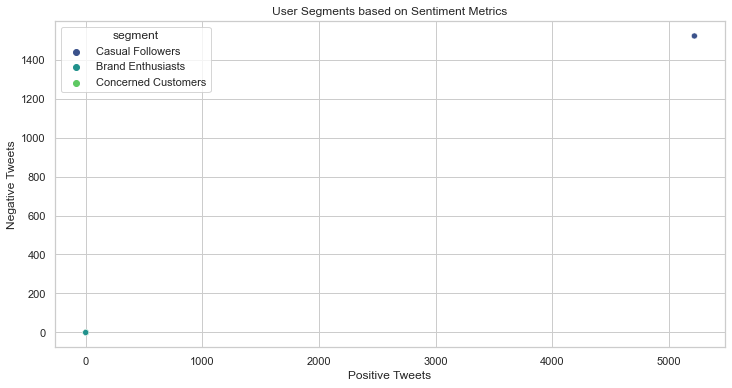

In [38]:
# Define a function to assign segment labels based on cluster characteristics
def assign_segment_label(cluster):
    if cluster == 0:
        return "Brand Enthusiasts"
    elif cluster == 1:
        return "Casual Followers"
    elif cluster == 2:
        return "Concerned Customers"
    else:
        return "Other"

# Apply the function to create a new 'segment' column
user_sentiment_metrics['segment'] = user_sentiment_metrics['cluster'].apply(assign_segment_label)

# Visualize the segments
plt.figure(figsize=(12, 6))
sns.scatterplot(x='positive_tweets', y='negative_tweets', hue='segment', data=user_sentiment_metrics, palette='viridis', legend='full')
plt.title('User Segments based on Sentiment Metrics')
plt.xlabel('Positive Tweets')
plt.ylabel('Negative Tweets')
plt.show()


Develop marketing messages and promotions tailored to each segment's sentiment profile. Positive segments may receive messages emphasizing brand loyalty, while negative segments may receive messages addressing concerns or offering solutions.

In [50]:
# !pip install squarify
# !pip install neattext
# !pip install wordcloud

In [41]:
combined_df['sentiment'].value_counts()

neutral     59252
positive    36816
negative    13556
Neutral      5259
Positive     5218
Negative     1521
Name: sentiment, dtype: int64

In [42]:
combined_df.duplicated()

0         False
1         False
2         False
3         False
6         False
          ...  
125213    False
125214    False
125215    False
125216    False
125217    False
Length: 121622, dtype: bool

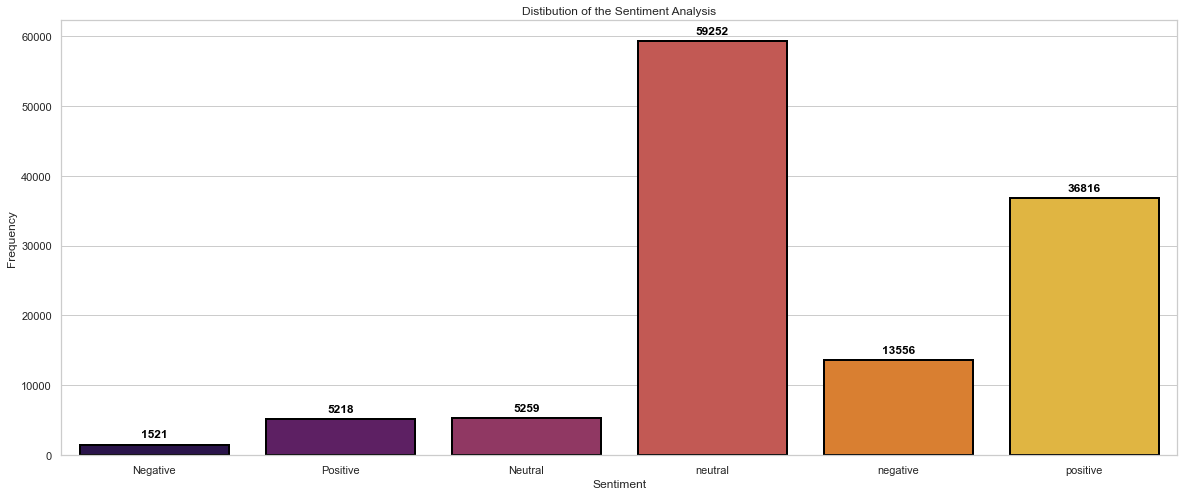

In [43]:
#Distribution of Sentiments
plt.figure(figsize=(20,8))     #width and height
sns.countplot(x='sentiment',data=combined_df, palette = 'inferno', linewidth=2, edgecolor='black')
plt.title("Distibution of the Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to plot
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(),
                       (p.get_x()+p.get_width()/2.,
                        p.get_height()), ha='center',
                        va='center', xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=12, color='black',
                          weight='bold')

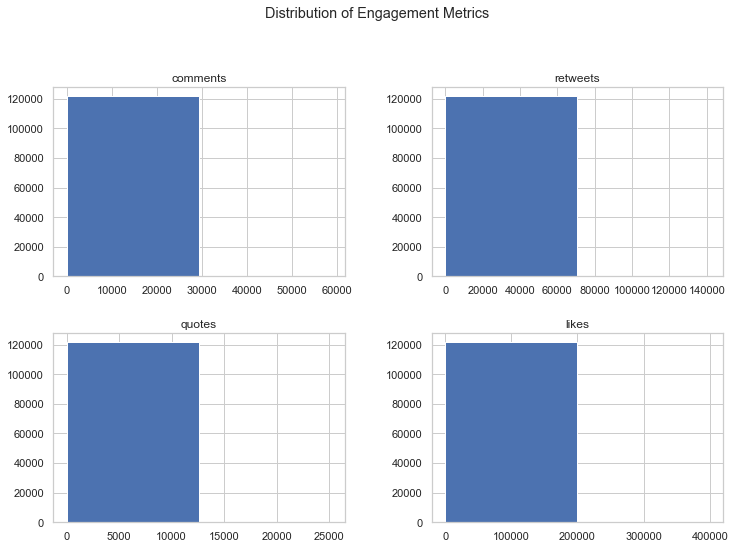

In [44]:
# Checking for Distribution of Engagement
engagement_metrics = ['comments', 'retweets', 'quotes', 'likes']
combined_df[engagement_metrics].hist(figsize=(12, 8), bins=2)
plt.suptitle('Distribution of Engagement Metrics', y=1.02)
plt.show()

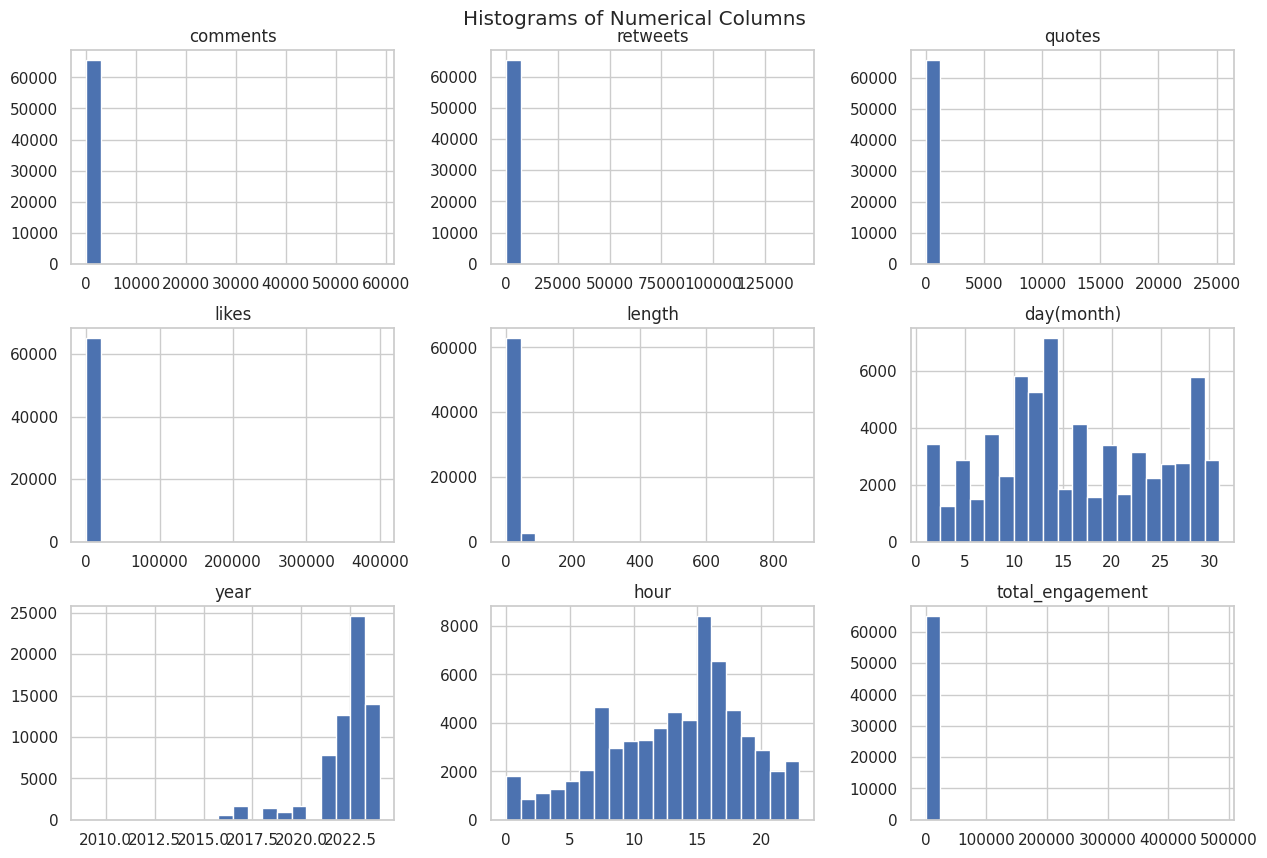

In [55]:
# Distribution of numerical columns
combined_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns', y=0.92)
plt.show()

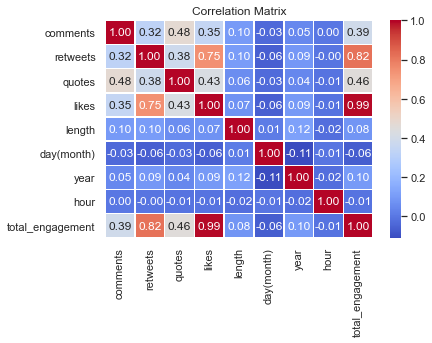

In [45]:
# Correlation matrix
corr_matrix = combined_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

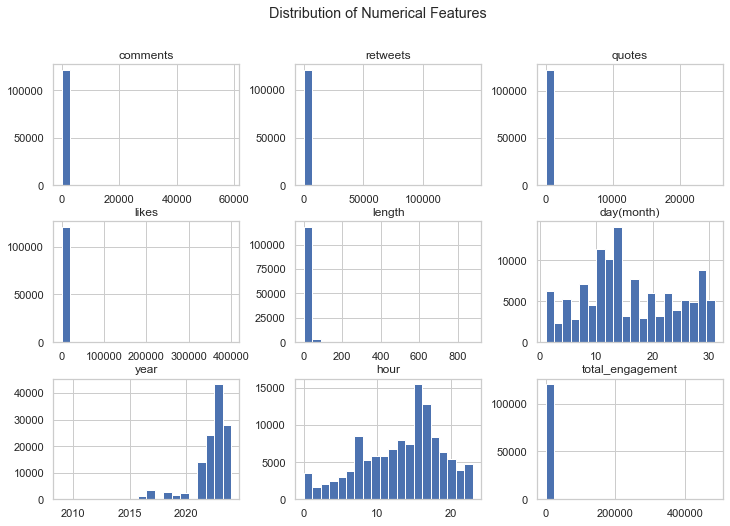

In [46]:
# Distribution of numerical features
numeric_columns = combined_df.select_dtypes(include=['int64', 'float64']).columns
combined_df[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Data preprocessing

Before conducting sentiment analysis, it is imperative to follow these essential steps: eliminating stop words, removing tags, URL links, and other extraneous words, tokenizing the text, and lemmatizing words.

In [47]:
#clean tweets
#Glance at data
combined_df['text'][:20]

0                guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there
1                                                                                            drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl
2                                                                                                                                                                                                                               kenyans wakitambua hii beer it is over for eabl
3                                                                                                                                                                                       

### Checking for tweet Length Consistency

In [48]:
combined_df['text'].apply(len).value_counts()

0       4051
7       2043
14      1473
15      1452
10      1358
        ... 
1314       1
1570       1
355        1
675        1
672        1
Name: text, Length: 820, dtype: int64

This gives an overview of the number of words per tweet. We also notice that some consist of less than five words therefore won't be instrumental in constructing our predictive model.

In [49]:
sum(combined_df['text'].apply(len) > 5) , sum(combined_df['text'].apply(len) <= 5)

(114438, 7184)

We note tht there are 64260 tweets with characters greater than 5 and  1523 tweets with characters less than 5 characters.

In [50]:
print("Shape of the dataset before filtering:")
print(combined_df.shape)
print("*"*40)
combined_df = combined_df[combined_df['text'].apply(len) > 5]
print("Shape of the dataset after filtering:")
print(combined_df.shape)

Shape of the dataset before filtering:
(121622, 15)
****************************************
Shape of the dataset after filtering:
(114438, 15)


### Checking for Duplicates in the dataset

In [51]:
print(combined_df.duplicated().sum())


885


We want to investigate if indeed these are duplicate values.

In [52]:
# checking if the duolicate values are indeed duplicates
combined_df[combined_df.duplicated(subset=['text'],keep=False)].sort_values(by='text').sample(10)

,text,sentiment,comments,retweets,quotes,likes,user,length,day(month),year,hour,day(week),month,total_engagement,weekday/end
46248,gilbeys ni wewe,neutral,2,0.0,0.0,3.0,@SeriesBlack7,3,19.0,2022.0,16.0,Wednesday,October,5.0,Weekday
44052,gilbeys,neutral,0,0.0,0.0,0.0,@thomskan,1,30.0,2022.0,5.0,Friday,December,0.0,Weekday
43971,gilbeys,neutral,1,0.0,0.0,7.0,@vanxris,1,1.0,2023.0,19.0,Sunday,January,8.0,Weekend
108782,drink a guinness,neutral,0,0.0,0.0,0.0,0,3,13.0,2024.0,4.0,Saturday,January,0.0,Weekend
15055,linustats for ceo bell,neutral,2,2.0,0.0,12.0,@Kizito_Isaac1,4,12.0,2023.0,14.0,Saturday,August,16.0,Weekend
117445,question who is the hunter incredible unethical disregard no integrity via zimbabwe bantrophyhunting hunters shoot 2nd collared research zimbabweelephants tusker in a month zimwildtrade,negative,0,0.0,0.0,0.0,0,24,8.0,2018.0,18.0,Tuesday,May,0.0,Weekday
124027,chromegin,Neutral,0,0.0,0.0,3.0,0,1,15.0,2022.0,11.0,Thursday,December,3.0,Weekday
36395,utanibuyia kuku na gilbeys,neutral,0,0.0,0.0,0.0,@CalMwaniki,4,31.0,2023.0,8.0,Sunday,December,0.0,Weekend
94664,ukikosa ya gilbeys unanunua chrome,neutral,0,0.0,0.0,0.0,0,5,13.0,2023.0,15.0,Friday,October,0.0,Weekday
30323,haha army theme,positive,0,0.0,0.0,2.0,@dagy_nyce,3,3.0,2021.0,22.0,Friday,September,2.0,Weekday


From the output displyed, it is not evident if there are duplicated tweets. We chose to retain the duplicates.

We will now got to preprocessing procedures which include tokenizing(spliting),stemming and lemmatization which are dependent on the model you choose to use.

For cleaning our text we are gling to use the NeatText Library. NeatText is a simple NLP package for cleaning textual data and text preprocessing. It offers a variety of features for cleaning unstructured text data, reducing noise (such as special characters and stopwords), and extracting specific information from the text. It can be used via an object-oriented approach or a functional/method-oriented approach, providing flexibility in its usage. The package includes classes such as TextCleaner, TextExtractor, and TextMetrics for different text processing tasks.

In [53]:
# load the text cleaning packages

import neattext as nt
import neattext.functions as nfx

# Methods and Attributes of the function
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [54]:
# Scaning the Noise
combined_df['text'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0          5.905512
1          3.370787
2          8.510638
3          7.142857
6          0.833333
            ...    
125213    10.606061
125214    11.718750
125215    11.111111
125216     0.000000
125217     0.000000
Name: text, Length: 114438, dtype: float64

In [55]:
# Ensure all entries in 'tweet' column are strings
combined_df['text'] = combined_df['text'].astype(str)

# Now apply the clean_text function
combined_df['clean_text'] = combined_df['text'].apply(lambda x: nfx.clean_text(x, puncts=False, stopwords=False))

In [56]:
combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer it is over for eabl
3,i thought eabl products are unwanted around the mountain,i thought eabl products are unwanted around the mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


### Special Characters

In [57]:
# Remove special characters

combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_special_characters)

combined_df[['text', 'clean_text']].sample(5)

,text,clean_text
122627,hctor rodrguez acaba de retirarse del grupo,hctor rodrguez acaba de retirarse del grupo
104962,kam na gilbeys,kam na gilbeys
44059,napelekea my cuzo food kwa crib napata ako na gilbeys mzinga msm,napelekea my cuzo food kwa crib napata ako na gilbeys mzinga msm
92821,gatau beres kesadaran lek kenek gilbeys ancen pasti parahhh kacau wkwkw,gatau beres kesadaran lek kenek gilbeys ancen pasti parahhh kacau wkwkw
124347,comrade chromegin mzinga ni pesa ngapi waiter ni 600 bob comrade nikopeshe ka quarter basi,comrade chromegin mzinga ni pesa ngapi waiter ni 600 bob comrade nikopeshe ka quarter basi


In [58]:
# Remove whitespaces
combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_multiple_spaces)

combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer it is over for eabl
3,i thought eabl products are unwanted around the mountain,i thought eabl products are unwanted around the mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


In [59]:
# Remove emojis
combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_emojis)

combined_df[['text', 'clean_text']].sample(5)

,text,clean_text
104705,check out jiji kanu wewe kabando kenya kwanza mcas hassan sheikh nairobi county teargasonnrg gilbeys scok section 80 kenya kwanza kiambaa rachel kenya kwanza drugs,check out jiji kanu wewe kabando kenya kwanza mcas hassan sheikh nairobi county teargasonnrg gilbeys scok section 80 kenya kwanza kiambaa rachel kenya kwanza drugs
31738,said he still supports the but added that the removal of his books is an abuse of the,said he still supports the but added that the removal of his books is an abuse of the
30475,kindly drop me sivawo by vyper ranking,kindly drop me sivawo by vyper ranking
16161,for this taking her for this years because kohen has confirmed he will be miss the vibe guys 1st july go courtesy,for this taking her for this years because kohen has confirmed he will be miss the vibe guys 1st july go courtesy
58112,elephant tramples man to death in mayurbhanj district,elephant tramples man to death in mayurbhanj district


###  Contractions

Contractions in a tweet refer to shortened forms of words or phrases that are created by combining two words and replacing one or more letters with an apostrophe. Contractions are commonly used in informal writing, including tweets, to save space and make the text more conversational.

In [71]:
# !pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.5 MB/s eta 0:00:00


In [60]:
import contractions

# Apply the contractions.fix function to the clean_tweet column
combined_df['clean_text'] = combined_df['clean_text'].apply(contractions.fix)

combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara could not be there
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer it is over for eabl
3,i thought eabl products are unwanted around the mountain,i thought eabl products are unwanted around the mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


In [61]:
# Extract stopwords
combined_df['clean_text'].apply(lambda x: nt.TextExtractor(x).extract_stopwords())

0         [do, you, was, from, they, about, what, to, of, the, same, if, of, could, not, be, there]
1                                                                       [at, a, by, after, the, on]
2                                                                               [it, is, over, for]
3                                                                             [i, are, around, the]
6                                                                                               [a]
                                                    ...                                            
125213                                                        [should, not, be, to, under, the, of]
125214         [these, to, be, in, the, front, as, the, of, the, in, the, back, they, have, to, be]
125215                                                                           [get, a, at, just]
125216                                                                                           []


In [62]:
# Removing the stop words

combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_stopwords)

combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer eabl
3,i thought eabl products are unwanted around the mountain,thought eabl products unwanted mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


#### swahili stop words

In [68]:
#removing swahili stop words
# Load your DataFrame
combined_df = pd.read_csv('Processed_data.csv')

# Load Swahili stopwords from the Excel file
swahili_stopwords = pd.read_csv('Common Swahili Stop-words.csv', header=None)
swahili_stopwords = list(swahili_stopwords[0])

# Function to remove Swahili stopwords from preprocessed text
def remove_swahili_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in swahili_stopwords]
        return ' '.join(filtered_words)
    else:
        return ''

# Apply the function to the 'preprocessed_text' column
combined_df['clean_text'] = combined_df['clean_text'].apply(remove_swahili_stopwords)

# Save the updated DataFrame to a new CSV file
combined_df.to_csv('Processed_data_without_swahili_stopwords.csv', index=False)

In [69]:
# Noise Scan after text cleaning
combined_df['clean_text'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0        0
1        0
2        0
3        0
4        0
        ..
64255    0
64256    0
64257    0
64258    0
64259    0
Name: clean_text, Length: 64260, dtype: int64

### Language Processing (Clean Text)

This involves Tokenization, Stemming / Lemmatization, Parts of Speech Tagging and Calculating Sentiment Based on Polarity & Subjectivity.

In [70]:
test_sample = combined_df['clean_text'].loc[500]

test_sample

'ko good product reach limitedeabl noticed gap swiftly moved fill gap interesting space watch'

In [71]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

tokenizer.tokenize(test_sample)

['ko',
 'good',
 'product',
 'reach',
 'limitedeabl',
 'noticed',
 'gap',
 'swiftly',
 'moved',
 'fill',
 'gap',
 'interesting',
 'space',
 'watch']

In [78]:
# Tokenise the clean_tweet column
combined_df['preprocessed_text'] = combined_df['clean_text'].apply(lambda x: tokenizer.tokenize(x))

In [83]:
combined_df.iloc[100]["preprocessed_text"][:20]

'soon start selling w'

In [84]:
combined_df[['clean_text', 'preprocessed_text']].iloc[100]

clean_text                   soon start selling water instead bear new lager flat hell unakunywa haishiki
preprocessed_text    soon start selling water instead bear new lager flat hell unakunywa na haishiki hata
Name: 100, dtype: object

### Lemmatization
Lemmatization is a linguistic processing technique that involves reducing words to their base or root form, known as the lemma.The purpose of lemmatization is to standardize and simplify words, considering different inflections or variations of a word as a single base form. This aids in tasks such as text analysis, natural language processing, and information retrieval by treating related forms of a word as identical

In [85]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\thomas.okiwi.TECHN
[nltk_data]     OBRAINBPO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
# Define a function to lemmatise the tokens
def lemmatise_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [87]:
import nltk
from nltk.stem import WordNetLemmatizer

# Define the lemmatization function
def lemmatise_tokens(tokens):
    if isinstance(tokens, str):  # Check if 'tokens' is a string and not NaN
        lemmatizer = nltk.stem.WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens.split()]  # Split the string into tokens
        return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a string
    else:
        return tokens  # Return NaN or the original value if 'tokens' is not a string

# Apply lemmatization to the 'preprocessed_text' column
combined_df['lemma_preprocessed_text'] = combined_df['preprocessed_text'].apply(lemmatise_tokens)

# Display the result
combined_df[['preprocessed_text', 'lemma_preprocessed_text']].iloc[400]

preprocessed_text          tyrece lacey daniel nwauzu return eabl players week regular stars turned big way teams game week eabl campaign week nines players week
lemma_preprocessed_text         tyrece lacey daniel nwauzu return eabl player week regular star turned big way team game week eabl campaign week nine player week
Name: 400, dtype: object

In [89]:
# Defining a function to stem the tokens
import nltk
from nltk.stem import PorterStemmer

# Define the stemming function
def stem_tokens(tokens):
    if isinstance(tokens, str):  # Check if 'tokens' is a string and not NaN
        stemmer = nltk.stem.PorterStemmer()
        stemmed_tokens = [stemmer.stem(token) for token in tokens.split()]  # Split the string into tokens
        return ' '.join(stemmed_tokens)  # Join the stemmed tokens back into a string
    else:
        return tokens  # Return NaN or the original value if 'tokens' is not a string

# Apply stemming to the 'preprocessed_text' column
combined_df['stemma_preprocessed_text'] = combined_df['preprocessed_text'].apply(stem_tokens)

# Display the result
combined_df[['preprocessed_text', 'stemma_preprocessed_text']].iloc[800]


preprocessed_text           walai sijapitia site yao hujua wao ni senator keg solo eabl ndio nimepitia products zao utaona drink fraction
stemma_preprocessed_text       walai sijapitia site yao hujua wao ni senat keg solo eabl ndio nimepitia product zao utaona drink fraction
Name: 800, dtype: object

### Calculatition of Sentiments Based on Polarity & Subjectivity
TextBlob is a Python library used for processing textual data, including sentiment analysis. It uses natural language processing (NLP) and the Natural Language Toolkit (NLTK) to achieve this task. When a sentence is passed into TextBlob, it returns two outputs: polarity and subjectivity. The polarity score is a float within the range [-1, 1], where -1 indicates a negative sentiment and 1 indicates a positive sentiment. The subjectivity score is a float within the range, where 0 is very objective and 1 is very subjective.

In [90]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
combined_df['Subjectivity'] = combined_df['clean_text'].apply(getSubjectivity)
combined_df['Polarity'] = combined_df['clean_text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
combined_df[['clean_text','Subjectivity','Polarity']].head()

,clean_text,Subjectivity,Polarity
0,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara,1.000000,-0.625000
1,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl,0.466667,0.233333
2,kenyans wakitambua beer eabl,0.000000,0.000000
3,thought eabl products unwanted mountain,0.000000,0.000000
4,unajua sai amafanya eabl anaweza tupea years supply balozi singleton yobra unapepeta tutablockiwa bana,0.000000,0.000000


In [91]:
# Creating a function to compute the negative, positive and nuetral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

combined_df['sentiment'] = combined_df['Polarity'].apply(getAnalysis)

# Showing the dataframe
combined_df[['clean_text','Subjectivity','Polarity','sentiment']].head()

,clean_text,Subjectivity,Polarity,sentiment
0,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara,1.000000,-0.625000,Negative
1,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl,0.466667,0.233333,Positive
2,kenyans wakitambua beer eabl,0.000000,0.000000,Neutral
3,thought eabl products unwanted mountain,0.000000,0.000000,Neutral
4,unajua sai amafanya eabl anaweza tupea years supply balozi singleton yobra unapepeta tutablockiwa bana,0.000000,0.000000,Neutral


In [92]:
combined_df['sentiment'].value_counts()

Neutral     37687
Positive    20049
Negative     6524
Name: sentiment, dtype: int64

In [93]:
#previewing our processed text
combined_df['preprocessed_text']

0        guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara
1                                   drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl
2                                                                                                                                                                kenyans wakitambua hii beer eabl
3                                                                                                                                                         thought eabl products unwanted mountain
4                                                                          unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana
                              

In [95]:
#previewing the processed data
# Define a function to join tokens into a string, handling NaN values
def join_tokens(tokens):
    if isinstance(tokens, list):
        return ' '.join(tokens)
    else:
        return ''

# Apply the function to the respective columns
combined_df['lemma_preprocessed_text'] = combined_df['lemma_preprocessed_text'].apply(join_tokens)
combined_df['stemma_preprocessed_text'] = combined_df['stemma_preprocessed_text'].apply(join_tokens)
combined_df['preprocessed_text'] = combined_df['preprocessed_text'].apply(join_tokens)

# Display the result
combined_df['preprocessed_text']



0         
1         
2         
3         
4         
        ..
64255     
64256     
64257     
64258     
64259     
Name: preprocessed_text, Length: 64260, dtype: object

In [96]:
#checking more information of the processed dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64260 entries, 0 to 64259
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   text                      64260 non-null  object 
 1   sentiment                 64260 non-null  object 
 2   comments                  64260 non-null  int64  
 3   retweets                  64260 non-null  int64  
 4   quotes                    64260 non-null  int64  
 5   likes                     64260 non-null  int64  
 6   length                    64260 non-null  int64  
 7   day(month)                63991 non-null  float64
 8   year                      63991 non-null  float64
 9   hour                      63991 non-null  float64
 10  day(week)                 63991 non-null  object 
 11  month                     63991 non-null  object 
 12  total_engagement          64260 non-null  int64  
 13  weekday/end               64260 non-null  object 
 14  clean_

In [122]:
# save the dataframe to csv using the name 'interim_data.csv' fo the data folder
combined_df.to_csv('Processed_data.csv', index=False)

In [123]:
Processed_df = pd.read_csv('Processed_data.csv')

Processed_df.sample()

,text,sentiment,comments,retweets,quotes,likes,length,day(month),year,hour,day(week),month,total_engagement,weekday/end,clean_text,preprocessed_text,lemma_preprocessed_text,stemma_preprocessed_text,Subjectivity,Polarity
6032,let the party begin leo tupatane blankets and wine event tu enjoy tusker cider baridi buy 2 6 pack tusker cider to get a ticket tupataneblankets welivefortaste,Positive,0,2,0,5,27,1.0,2023.0,13.0,Sunday,October,7,Weekend,let party begin leo tupatane blankets wine event enjoy tusker cider baridi buy 2 6 pack tusker cider ticket tupataneblankets welivefortaste,NaN,NaN,NaN,0.5,0.4


In [124]:
#checking for shape
Processed_df.shape

(64260, 20)

In [125]:
#Checking for missing values
Processed_df.isna().sum()

text                            0
sentiment                       0
comments                        0
retweets                        0
quotes                          0
likes                           0
length                          0
day(month)                    269
year                          269
hour                          269
day(week)                     269
month                         269
total_engagement                0
weekday/end                     0
clean_text                    229
preprocessed_text           64260
lemma_preprocessed_text     64260
stemma_preprocessed_text    64260
Subjectivity                    0
Polarity                        0
dtype: int64

We note that we have some missing values in our dataset. We chose to drop them since we won't be losing a good chunk of data.

In [126]:
# drop the null values
Processed_df.dropna(inplace=True)
Processed_df.isna().sum()

text                        0
sentiment                   0
comments                    0
retweets                    0
quotes                      0
likes                       0
length                      0
day(month)                  0
year                        0
hour                        0
day(week)                   0
month                       0
total_engagement            0
weekday/end                 0
clean_text                  0
preprocessed_text           0
lemma_preprocessed_text     0
stemma_preprocessed_text    0
Subjectivity                0
Polarity                    0
dtype: int64

In [129]:
# creat a word frequency analysis using the top 10 most common words in the 'preprocessed_text' column.

Processed_df['text_temp'] = Processed_df['preprocessed_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in Processed_df['text_temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [103]:
# plotting top 10 most frequent words using seaborn.
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="count",y="Common_words", data=temp, palette="inferno", linewidth=2,edgecolor='green')
plt.title("Most Common Words in Tweet Text")
plt.xlabel("Number of Occurrences")
plt.ylabel("Common Words")

# Addd annotaions for the barplots.
for i,j in enumerate(temp["count"]):
    ax.text(.7,i,j,weight="bold",color="white",fontsize=12)

plt.show()

ValueError: Could not interpret input 'count'

<Figure size 1440x576 with 0 Axes>

In [117]:
#Character Counts by Tweet text
def _get_charcounts(x):
    r = x.split()
    b= ''.join(s)
    return len(x)

count       0
unique      0
top       NaN
freq      NaN
Name: text_len, dtype: object

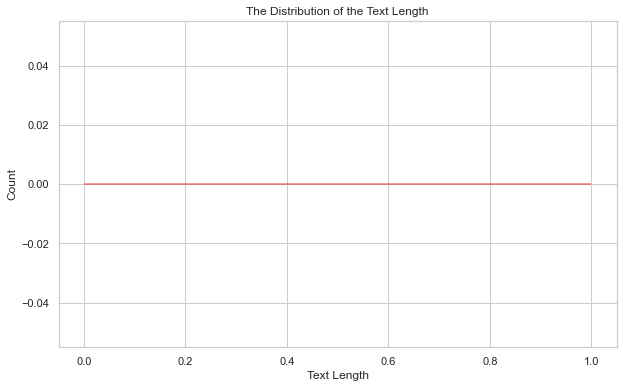

In [118]:
# getting the character length for each tweet
Processed_df['text_len'] = Processed_df['text'].apply(lambda x:len(x))

display(Processed_df['text_len'].describe())

# plotting the distribution of the tweet length
plt.figure(figsize=(10,6))
sns.distplot(Processed_df['text_len'], color='teal',kde=False, hist_kws=dict(edgecolor="red", linewidth=2), bins=50)
plt.title('The Distribution of the Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')

plt.show()

,preprocessed_text,word_counts
52717,serengetipremiumlager paidpartnershipwithdiageo,2
1545,oktoba fest mimi nilikua najua ni kama csr eabl sasa wanaharibu,11
44686,gilbeys mnakunywa kavu lakini nikipika managu haina chumvi mnasema ni kali,11
14883,heard chauvinistic promoting usual unleaded portent local brews let gender fact use time sipping cheap brew fear women,18
52730,wanasema mvua ikinyesha ata kiu usikii mimi kwangu imekuwa tofauti karibuni sana ethiopia maana huku hakuna mvua chuki munyama serengeti lager serengetipremiumlager paidpartnershipwithdiageo ad,24


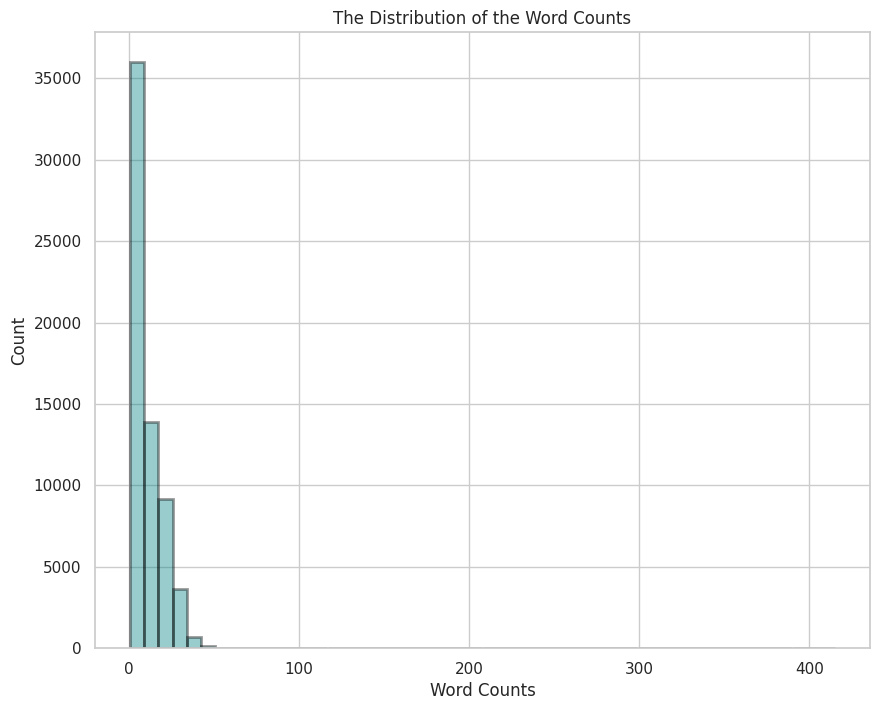

In [100]:
#Word Count by Tweet
def _get_wordcounts(x):
    length = len(str(x).split())
    return length

Processed_df['word_counts'] = Processed_df['preprocessed_text'].apply(lambda x:_get_wordcounts(x))

display(Processed_df[['preprocessed_text','word_counts']].sample(5))

Processed_df['word_counts'].describe()

# plot word_counts
plt.figure(figsize=(10,8))
sns.distplot(Processed_df['word_counts'], color='teal', kde=False, hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('The Distribution of the Word Counts')
plt.xlabel('Word Counts')
plt.ylabel('Count')


plt.show()

The histogram shows that the most common word count is between 20 and 50. The distribution is skewed to the left, meaning that there are more tweets with lower word counts than higher word counts.

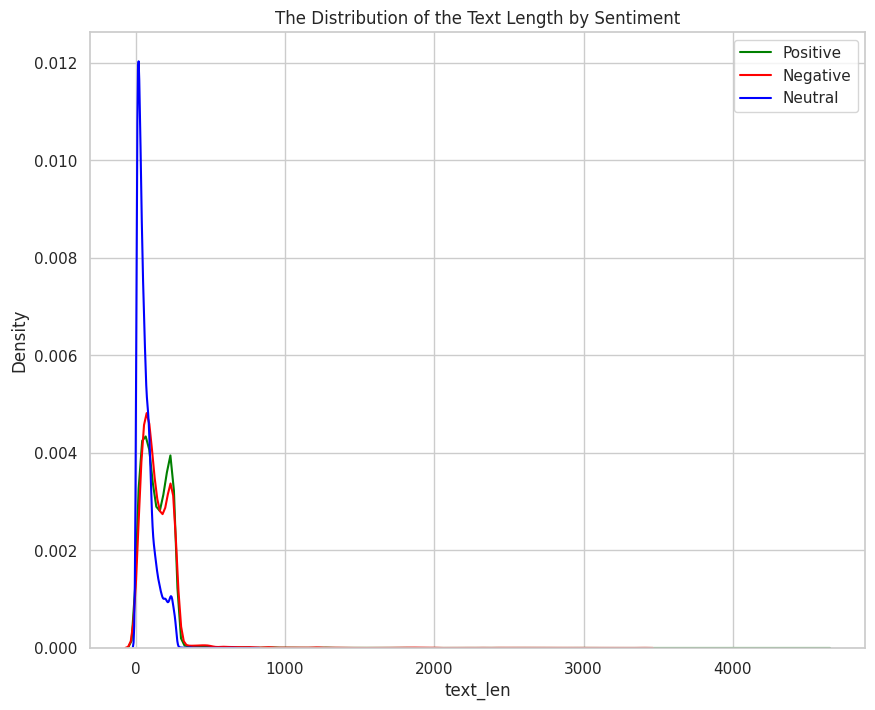

In [101]:
# Character Count by Sentiment
plt.figure(figsize=(10, 8))
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Positive']['text_len'], color='green', label='Positive', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Negative']['text_len'], color='red', label='Negative', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Neutral']['text_len'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Text Length by Sentiment')
plt.legend()

plt.show()

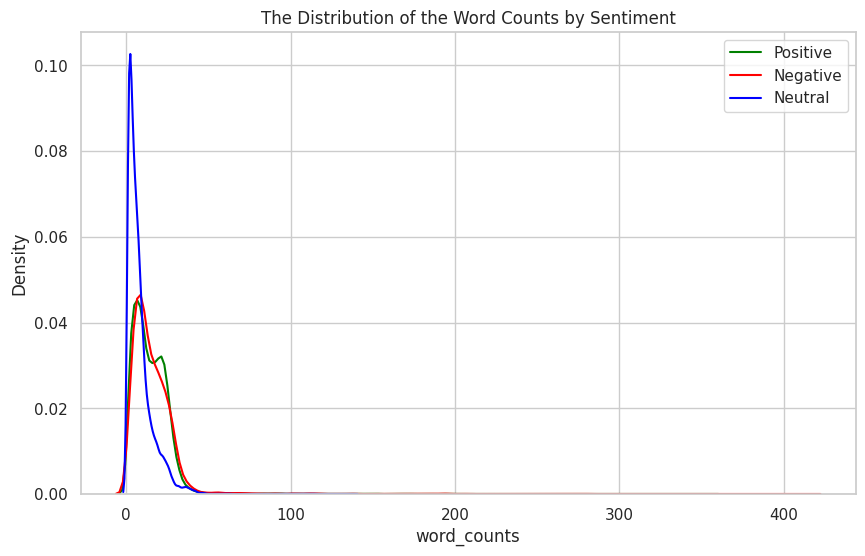

In [102]:
# word_count by sentiment type
plt.figure(figsize=(10, 6))
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Positive']['word_counts'], color='green', label='Positive', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Negative']['word_counts'], color='red', label='Negative', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Neutral']['word_counts'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Word Counts by Sentiment')
plt.legend()

plt.show()

### Sentiment Analysis
Distribution of Sentiments

In [103]:
Processed_df['sentiment'].value_counts()

Neutral     37079
Positive    19903
Negative     6779
Name: sentiment, dtype: int64

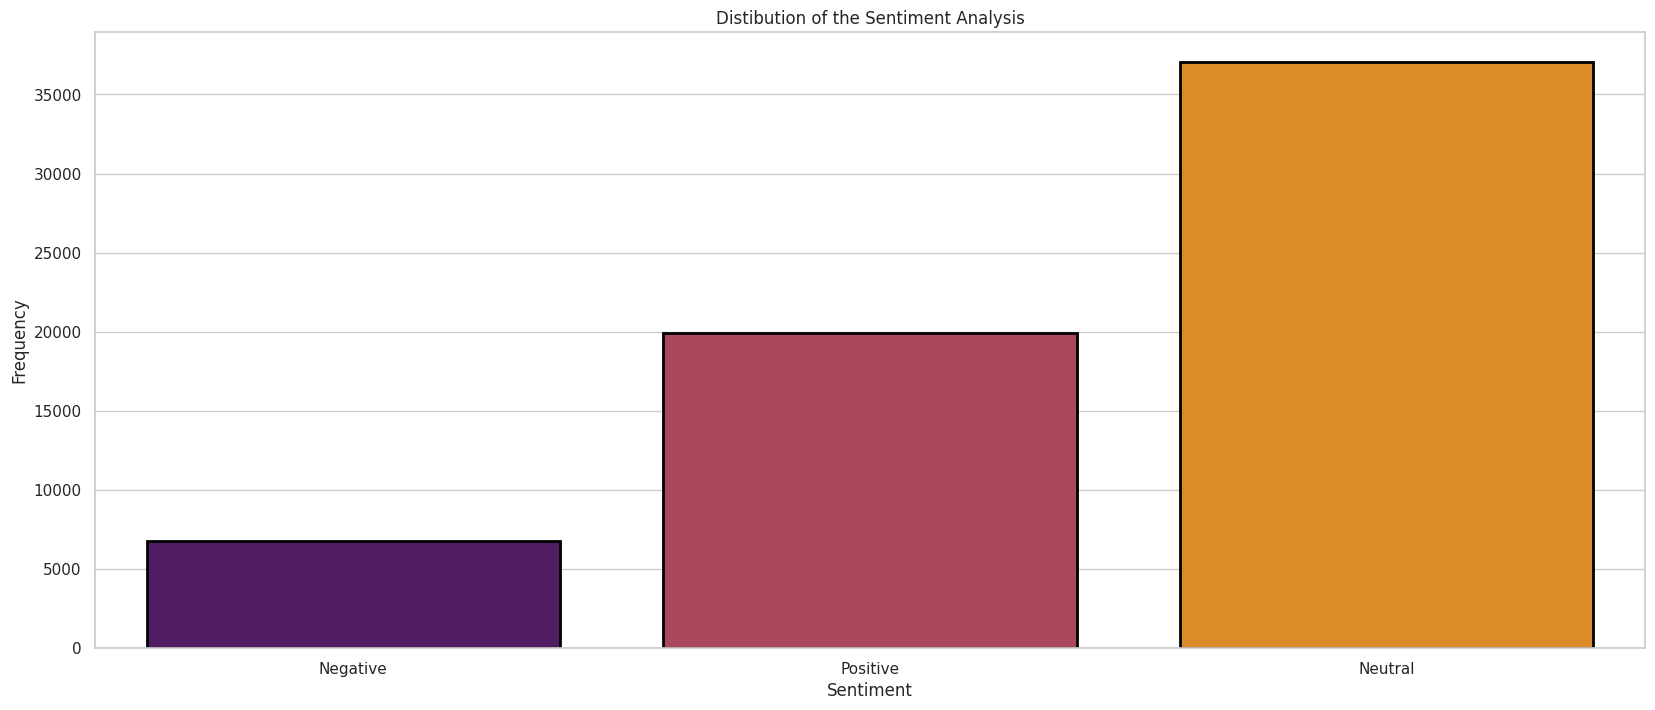

In [104]:
#bargraph plot for sentiment analysis
plt.figure(figsize=(20,8)) #width and height
sns.countplot(x='sentiment',data=Processed_df, palette = 'inferno', linewidth=2, edgecolor='black')
plt.title("Distibution of the Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to plot
for n in plt.gca().patches:
    plt.gca().annotate(p.get_height(),
                       (p.get_x()+p.get_width()/2.,
                        p.get_height()), ha='center',
                        va='center', xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=12, color='black',
                          weight='bold')


plt.show()

There is sampple imban ce in our datasdet. We shall upsample to creat ballce befor modeling.

In [105]:
#Positive sentiment analysis
# Most common positive words
Processed_df_pos = Processed_df[Processed_df['sentiment'] == 'Positive']
top = Counter([item for sublist in Processed_df_pos['text_temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,tusker,3560
1,gilbeys,3448
2,good,1883
3,guinness,1593
4,enjoy,1487
5,ad,1442
6,eabl,1420
7,tickets,1416
8,na,1308
9,today,1227


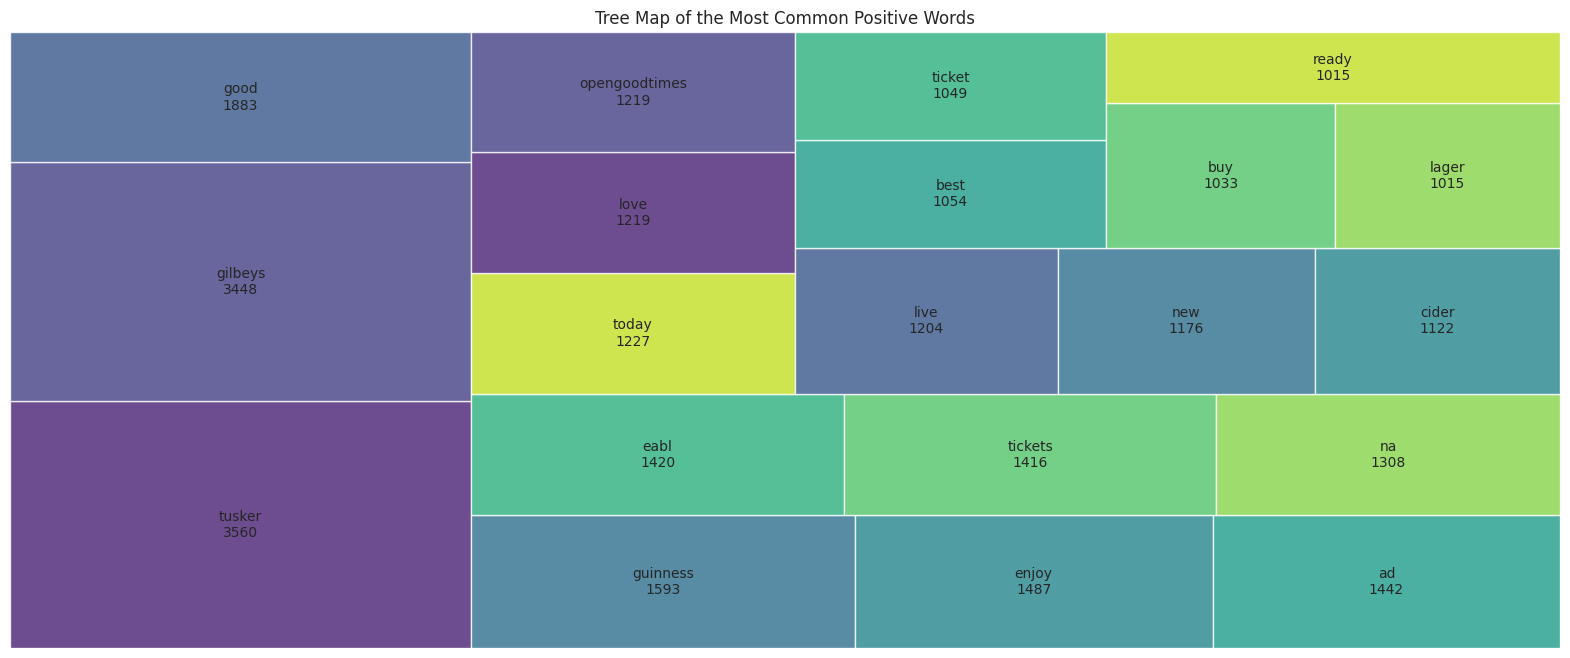

In [106]:
# plotting a tree map to show the positive sentiments
plt.figure(figsize=(20,8))

# Create labels with word counts
words_pos = [f"{word}\n{count}" for word, count in zip(temp_positive['Common_words'], temp_positive['count'])]

# Use a valid colormap name, for example, 'viridis'
squarify.plot(sizes=temp_positive['count'], label=words_pos, alpha=0.8, color=sns.color_palette("viridis", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Positive Words')
plt.axis('off')
plt.show()

In [107]:
# Getting the most positive tweets

y = 1
sortedDF = Processed_df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
positive_tweets = []  # list to store positive tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Positive'):
    positive_tweets.append(sortedDF['text'][i])
    y = y+1

# Convert list to DataFrame
positive_tweets_df = pd.DataFrame(positive_tweets, columns=['Positive Tweets'])

positive_tweets_df

,Positive Tweets
0,kalenjin women are the best as wives fr i am talking about vienyejis si hawa wa gilbeys
1,yooh tufike thorn treekibera tukamate gilbeys remember for any purchase of bucket of beer or spirit you shall be served with a delicious mbuzi beiyajioni courtesy of kumbuka drinkbetternotmore check out to see your
2,gilbeys ndio best quickmart supermarket quickmart offer quickmartcrazyoffers
3,the hennessy too went through the shaking ordeal muratina wine changaa busaa best pilsner jd jw gilbeysyote ni pombe imo
4,try the guinness challenge first sip must perfectly underline guinness cheers
...,...
19898,what do you prefer roasted chicken or goats meat anyway get ready to enjoy your fav bites at roastandrhyme this sunday grab a ticket via roastandrhymecom or dail 291 at just 100k cheerstotheholidays thisishowwedo cc
19899,ad enjoy opengoodtimes at the mixedandmatched pinknic with at absa grounds 28th jan 3pm late dress code mixmatch with a touch of pink tickets 1 350ml gilbeys mixed berries 1 1 750ml 2 2 750ml squad tickets 5 people
19900,ad enjoy opengoodtimes at the mixedandmatched pinknic with at absa grounds 28th jan 3pm late dress code mixmatch with a touch of pink tickets 1 350ml gilbeys mixed berries 1 1 750ml 2 2 750ml squad tickets 5 people
19901,this packaging is so cheap looks horrible eastafricanbreweries pls come up with better packaging or revert back to the old packaging this is not kenya cane class smirnoff eabl vodka


### Negative Sentiment Analysis

In [108]:
# Most Common Negative Words
Processed_df_neg = Processed_df[Processed_df['sentiment'] == 'Negative']
top = Counter([item for sublist in Processed_df_neg['text_temp'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,gilbeys,1711
1,tusker,766
2,na,729
3,eabl,722
4,ad,548
5,guinness,546
6,mixed,546
7,opengoodtimes,534
8,tickets,487
9,ticket,441


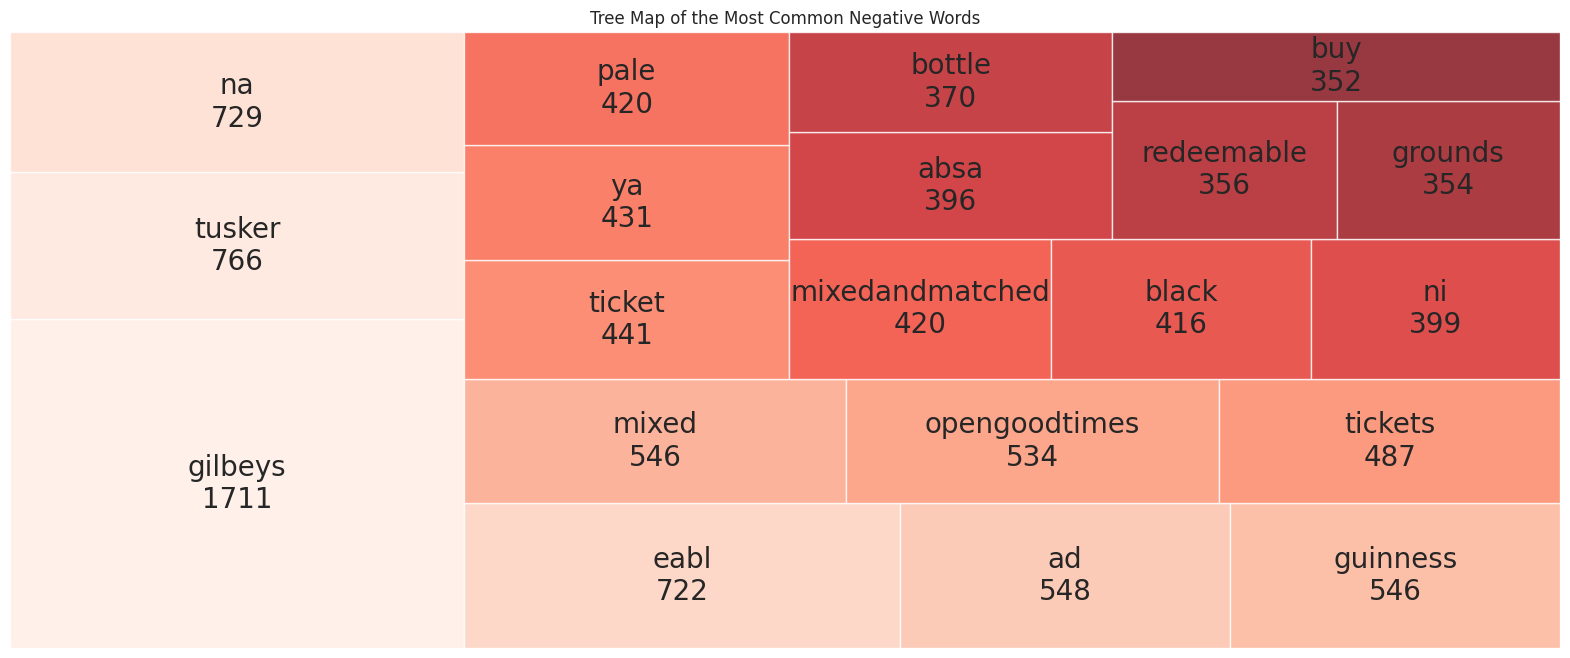

In [109]:
# plotting a tree map to show the negative sentiments
plt.figure(figsize=(20,8))

# Create labels with word counts
labels_neg = [f"{word}\n{count}" for word, count in zip(temp_negative['Common_words'], temp_negative['count'])]

squarify.plot(sizes=temp_negative['count'], label=labels_neg , alpha=0.8, color=sns.color_palette("Reds", 20), text_kwargs={'fontsize':20})

plt.title('Tree Map of the Most Common Negative Words')
plt.axis('off')

plt.show()

In [110]:
# Getting the most negative tweets

y = 1
sortedDF = Processed_df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
Processed_negative_tweets = []  # list to store negative tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Negative'):
    Processed_negative_tweets.append(sortedDF['clean_text'][i])
    y = y+1

# Convert list to DataFrame
Processed_negative_tweets = pd.DataFrame(Processed_negative_tweets, columns=['Negative Tweets'])

Processed_negative_tweets

,Negative Tweets
0,rare giant tusker elephant killed poachers 25 left wild giant tusker elephant killed poachers dlvritnyxkld
1,artistes remixes drag think saving lame screenshot reason use time wisely stream favs snoozefest album atleast jk 6 individual guinness world records cry harder
2,big things come huge packages tusker casually strolling mara puny landcruiser looks marben saturdaymotivation onerainbow safari safariweek masaimara holiday wild traveldiaries
3,day 1984 rts today tonight broadcast landmark programme aftermath tidey kidnapping programme presented brendan obrien set answer unanswered questions circumstances kidnapping murder recruit garda gary sheehan private patrick kelly derrada wood outside ballinamore kidnappers vastly outnumbered manage shoot way safety escaped socalled ring steel chosen leitrim support county revealed ring steel ...
4,lie meets honest relationship trust lies wrong yes mental issues accept lies living fantasy world
...,...
6774,buying gilbeys 750ml 4500 shillings insane
6775,insane gm tweet starts players accountable roster looks way
6776,gilbeys definitely worst drink waah heri bestchrome
6777,bholaashankar ki 5 ichinappdu shocking ani kakunda pachha manda antha essays raasaaru kada ra cut cheste okkati kuda nijam leni stories rastaru


### Neutral Sentiment Analysis

In [111]:
# Most Common Neutral Words
df_neu = Processed_df[Processed_df['sentiment'] == 'Neutral']
top = Counter([item for sublist in df_neu['text_temp'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
0,gilbeys,8906
1,tusker,4666
2,na,3196
3,guinness,2469
4,eabl,2233
5,ya,2149
6,ni,1564
7,lager,1473
8,de,1295
9,buy,1289


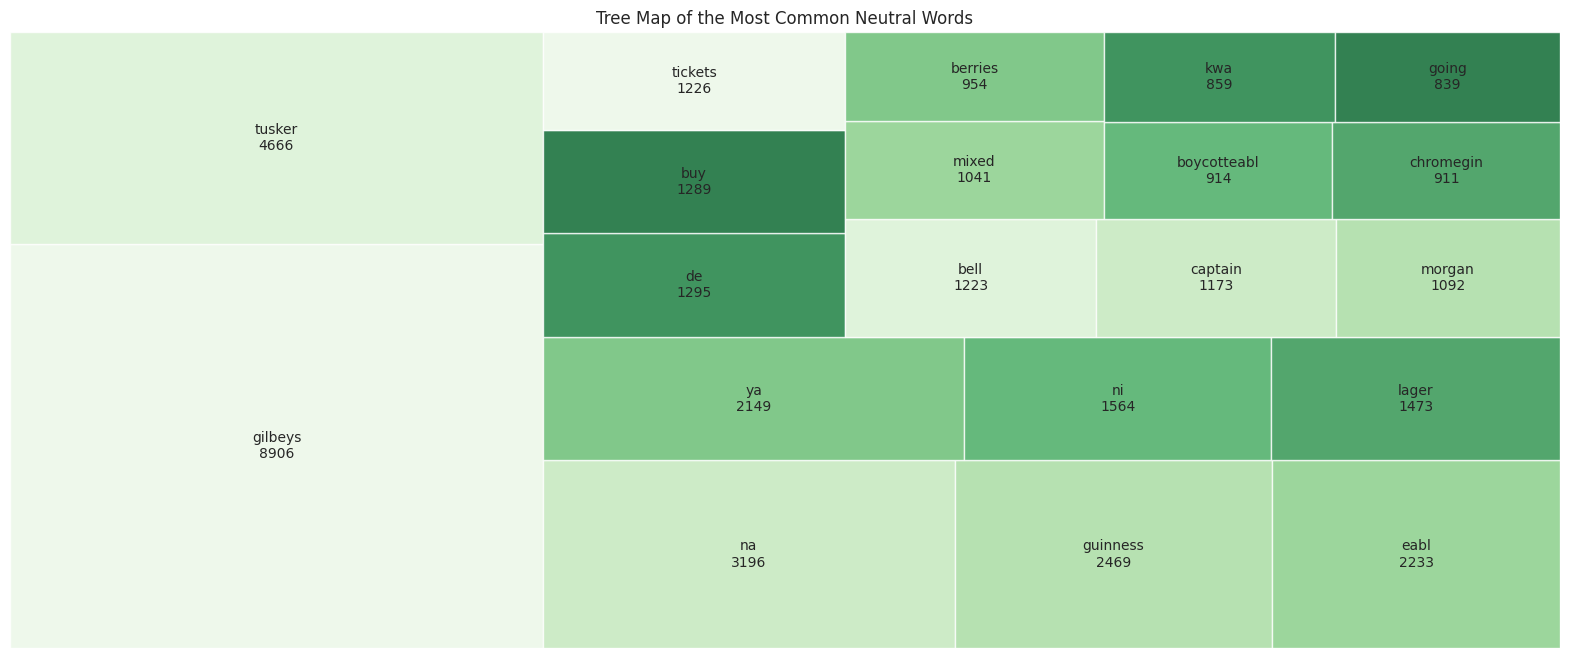

In [112]:
plt.figure(figsize=(20, 8))

# Create labels with word counts for neutral words
word_neu = [f"{word}\n{count}" for word, count in zip(temp_neutral['Common_words'], temp_neutral['count'])]

# Use a valid colormap name, for example, 'Greens'
squarify.plot(sizes=temp_neutral['count'], label=word_neu, alpha=0.8, color=sns.color_palette("Greens", 10), text_kwargs={'fontsize': 10})

plt.title('Tree Map of the Most Common Neutral Words')
plt.axis('off')
plt.show()


In [113]:
# Getting the most Neutral tweets

y = 1
sortedDF = Processed_df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
Neutral_tweets = []  # list to store Neutral tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Neutral'):
    Neutral_tweets.append(sortedDF['text'][i])
    y = y+1

# Convert list to DataFrame
Neutral_tweets_df = pd.DataFrame(Neutral_tweets, columns=['Neutral Tweets'])

Neutral_tweets_df

,Neutral Tweets
0,gilbeys
1,los niu los nuevos para los que no sepan inglich
2,hurdles gunturkaaram sunc avvatlede
3,bu arada bilen bilir gordonsn olduu yerde gilbeys dezenfektan olarak kullanlr
4,asalu sandhya70 tickets okkataina konnarani kani ila evaro show teeskunnarani ekkadaina chusava least talked topic idi
...,...
37074,ray epps the man who directed people to go into the capitol and privately claimed credit for orchestrating the capitol breach gets one year probation nothing to see here
37075,lets be mutuals
37076,snow plowing is finished up time for a captain morgan and watch the fire burn
37077,2023 nfl fan of the year presented by captain morgan


### Dealing with sample imbalance

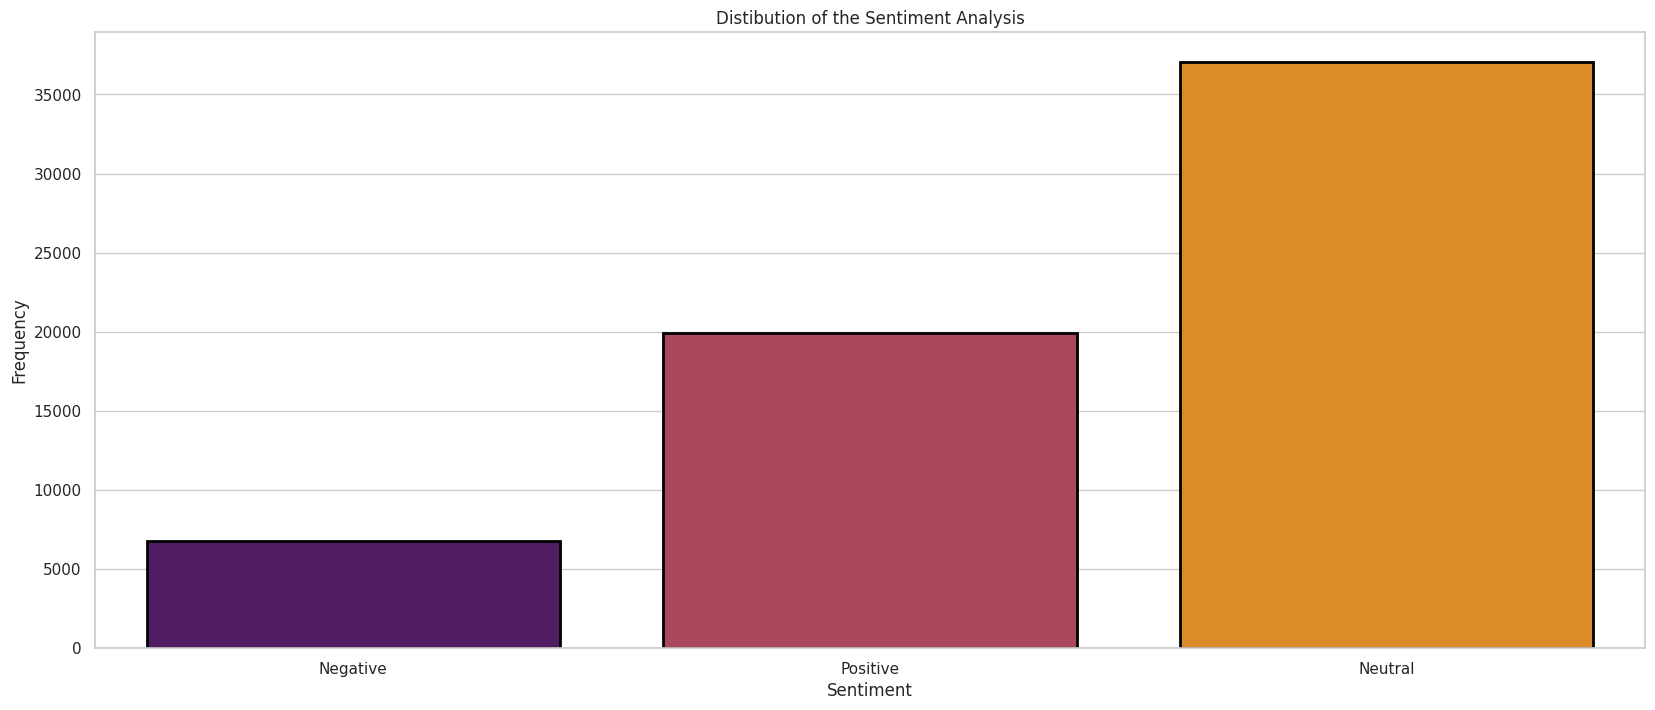

In [114]:
#bargraph plot for sentiment analysis
plt.figure(figsize=(20,8)) #width and height
sns.countplot(x='sentiment',data=Processed_df, palette = 'inferno', linewidth=2, edgecolor='black')
plt.title("Distibution of the Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to plot
for n in plt.gca().patches:
    plt.gca().annotate(p.get_height(),
                       (p.get_x()+p.get_width()/2.,
                        p.get_height()), ha='center',
                        va='center', xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=12, color='black',
                          weight='bold')


plt.show()

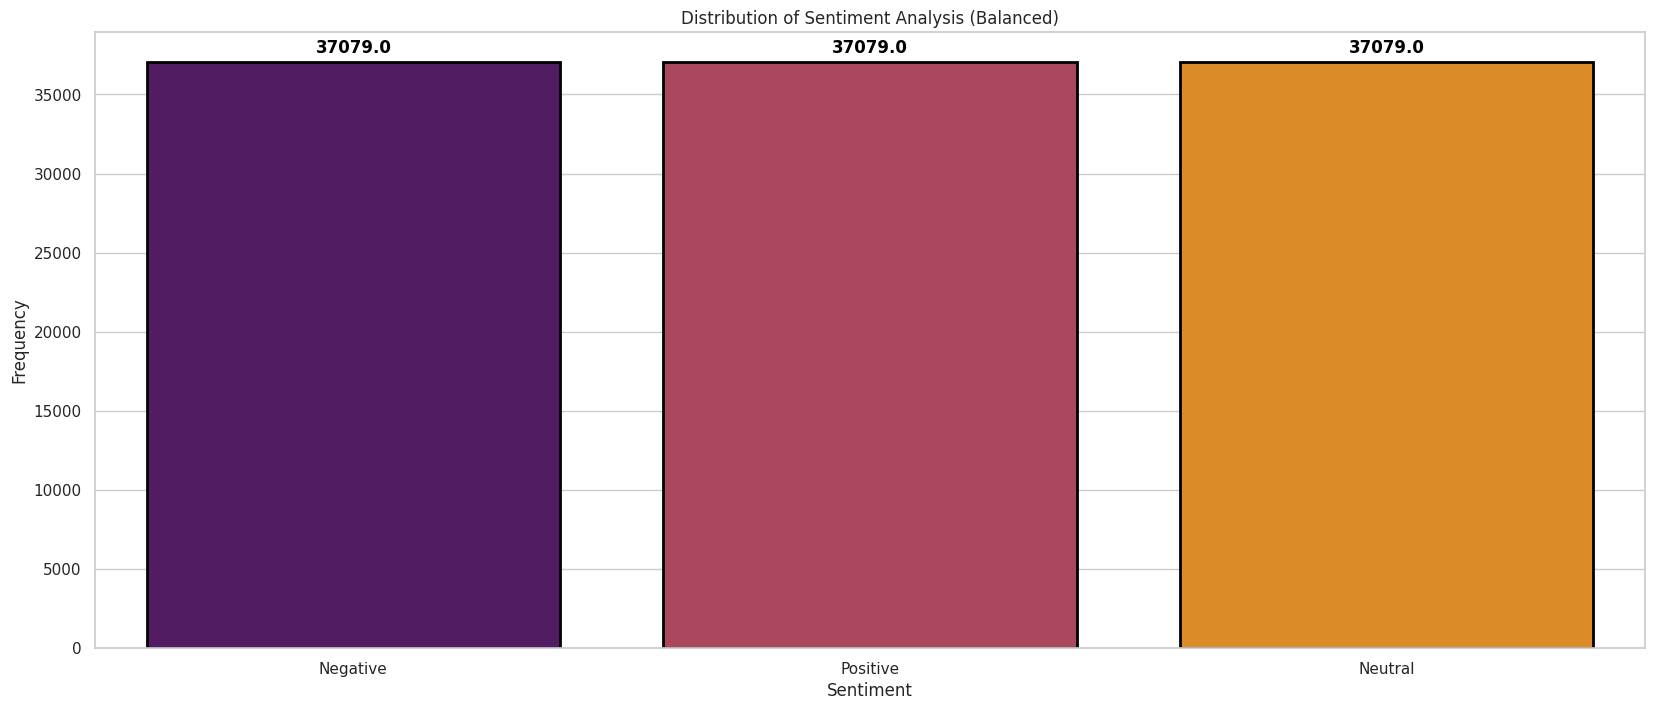

In [115]:

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming 'Processed_df' contains your dataset with 'sentiment' column

# Balancing the dataset using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Processed_df['text_temp'].values.reshape(-1, 1), Processed_df['sentiment'])

# Creating a DataFrame with the resampled data
balanced_df = pd.DataFrame({'text_temp': X_resampled.flatten(), 'sentiment': y_resampled})

# Plotting the bar graph for sentiment analysis
plt.figure(figsize=(20, 8))
sns.countplot(x='sentiment', data=balanced_df, palette='inferno', linewidth=2, edgecolor='black')
plt.title("Distribution of Sentiment Analysis (Balanced)")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to the plot
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(),
                       (p.get_x()+p.get_width()/2.,
                        p.get_height()), ha='center',
                        va='center', xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=12, color='black',
                        weight='bold')

plt.show()


# Modeling

Now the the distribution of the data is balaced.

### Data Preparation
### Spliting Data into Train and Test

In [135]:

from sklearn.model_selection import train_test_split


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df['text_temp'], balanced_df['sentiment'], test_size=0.2, random_state=42)



In [136]:

from sklearn.feature_extraction.text import TfidfVectorizer


# Convert lists of text into a single string or a list of strings
X_train = [' '.join(map(str, sublist)) for sublist in X_train]
X_test = [' '.join(map(str, sublist)) for sublist in X_test]

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [137]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()


In [138]:
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [139]:
predictions = model.predict(X_test_tfidf)


In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.7813286587558432

Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.85      0.78      7358
     Neutral       0.85      0.67      0.75      7491
    Positive       0.80      0.82      0.81      7399

    accuracy                           0.78     22248
   macro avg       0.79      0.78      0.78     22248
weighted avg       0.79      0.78      0.78     22248


Confusion Matrix:
 [[6289  488  581]
 [1543 4994  954]
 [ 931  368 6100]]


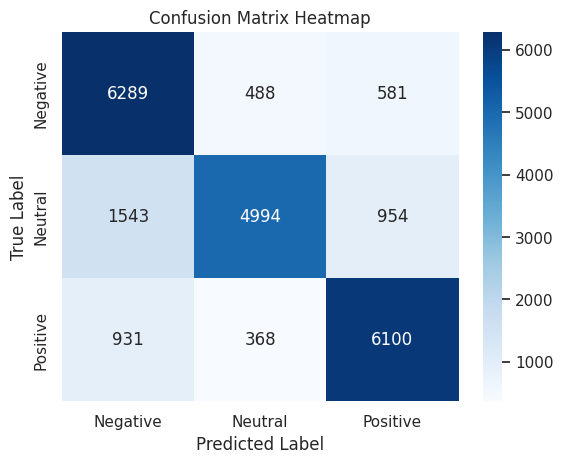

In [141]:

from sklearn.metrics import confusion_matrix



# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Recommendations:
##### 1.  Brand Perception and Engagement:
EABL should capitalize on the positive sentiments expressed by customers, especially around popular brands like Tusker and Gilbey's by developing effective marketing strategies to amplify and maintain the positive image.
The company should also consider targeted campaigns/Events to address issues raised in negative sentiment in the different brands.

##### 2. Marketing Campaign Effectiveness:

EABL should continue monitoring social media reactions to marketing campaigns/Events to gauge effectiveness by using insights to refine future campaigns and promotions and ensuring they resonate positively with the target audience.
They should also encourage user-generated content and interaction to increase positive experiences.

##### 3. Continuous Social Media Monitoring & Regular Surveys:

The company should implement a real-time social media monitoring system to stay updated on evolving social media sentiments and Conduct periodic surveys to gather structured feedback from customers then use the insights to identify/address areas for innovation and enhancement.

### Conclusion:

In conclusion, the sentiment analysis revealed valuable insights into public perception of EABL brands & their sponsored campaigns/Events on social media. Positive sentiments around brands indicate strong brand loyalty, while negative sentiments point to specific areas that require attention. EABL should leverage positive sentiments, address concerns, and continue monitoring social media for ongoing improvement.

### Limitations:

##### 1. Data Source Limitations:

The sentiment analysis relies on data primarily from Twitter and Google News. This didn't fully capture the diverse opinions of all customers in different social media platforms.

##### 2. Bias in Social Media Data:

Social media data may have inherent biases and may not represent the views of the entire customer base. The analysis might be skewed towards more active users on these platforms.

### Next Steps:

##### 1. Diversify Data Sources:

Expand data collection to include other social media platforms and online forums such as Facebook, Instagram, this will ensure a more comprehensive understanding of public sentiment.

##### 2.  Continuous Model Improvement:

To continue refining the models to improve accuracy and explore  more advanced natural language processing techniques.

##### 3.  Real-time Monitoring:

Implement a real-time monitoring system to track sentiments and reactions promptly. This will allow EABL to respond swiftly to emerging trends and issues.

Citation: 
EABL. (2023). Retrieved from BRANDS: https://www.eabl.com/our-brands